# LetsGrowMoreVIP - Data Science Intern - JANUARY 2022
Bhavya Jain

Beginner Level Task 2 - Stock Market Prediction and Forecasting using stacked LSTM

# Importing Required Libraries

In [11]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import math 
import seaborn as sb 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Read Data from csv file.

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Text(0, 0.5, 'Close')

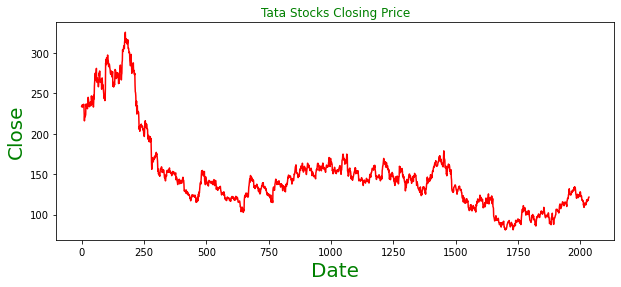

In [23]:
plt.figure(figsize = (10,4))
plt.title('Tata Stocks Closing Price', color='Green')
plt.plot(data['Close'], color='Red')
plt.xlabel('Date',fontsize=20, color='Green')
plt.ylabel('Close',fontsize=20, color='Green')

In [24]:
data_close = data.reset_index()['Close']
data_close.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: Close, dtype: float64

In [25]:
scaler = MinMaxScaler(feature_range = (0, 1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1, 1))
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Now, we split our data into Training data (85%) and Testing data (15%)

In [26]:
train_size = int(len(data_close) * 0.85)
test_size = len(data_close) - train_size
train_data, test_data = data_close[0 : train_size, :], data_close[train_size : len(data_close), : 1]

In [27]:
train_size, test_size

(1729, 306)

In [28]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.02920752],
       [0.02328431],
       [0.01919935]])

In [29]:
def create_dataset(dataset, time_step = 1):
    X_data, Y_data = [], []
    for i in range(len(dataset) - time_step - 1):
	    a = dataset[i : (i + time_step), 0] 
	    X_data.append(a)
	    Y_data.append(dataset[i + time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [30]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1628, 100) (1628,)
(205, 100) (205,)


In [32]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

# Now we create the Stacked LSTM Model

In [ ]:
lst = Sequential()
lst.add(LSTM(50,return_sequences = True, input_shape = (100, 1)))
lst.add(LSTM(50, return_sequences = True))
lst.add(LSTM(50))
lst.add(Dense(1))
lst.compile(loss = 'mean_squared_error', optimizer='adam')

In [34]:
lst.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
lst.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
26/26 [==============================] - 6s 122ms/step - loss: 0.0222 - val_loss: 0.0040
Epoch 2/100
26/26 [==============================] - 2s 86ms/step - loss: 0.0022 - val_loss: 4.6755e-04
Epoch 3/100
26/26 [==============================] - 2s 79ms/step - loss: 0.0015 - val_loss: 4.9127e-04
Epoch 4/100
26/26 [==============================] - 2s 78ms/step - loss: 0.0013 - val_loss: 4.7683e-04
Epoch 5/100
26/26 [==============================] - 2s 82ms/step - loss: 0.0013 - val_loss: 4.2115e-04
Epoch 6/100
26/26 [==============================] - 2s 79ms/step - loss: 0.0012 - val_loss: 4.1271e-04
Epoch 7/100
26/26 [==============================] - 2s 80ms/step - loss: 0.0011 - val_loss: 3.8872e-04
Epoch 8/100
26/26 [==============================] - 2s 80ms/step - loss: 0.0010 - val_loss: 3.8018e-04
Epoch 9/100
26/26 [==============================] - 2s 79ms/step - loss: 0.0012 - val_loss: 5.1793e-04
Epoch 10/100
26/26 [==============================] - 2s 79ms/step 

26/26 [==============================] - 2s 82ms/step - loss: 2.3027e-04 - val_loss: 1.3567e-04
Epoch 77/100
26/26 [==============================] - 2s 82ms/step - loss: 2.2240e-04 - val_loss: 1.5314e-04
Epoch 78/100
26/26 [==============================] - 2s 83ms/step - loss: 2.4766e-04 - val_loss: 1.6369e-04
Epoch 79/100
26/26 [==============================] - 2s 83ms/step - loss: 2.7886e-04 - val_loss: 1.5621e-04
Epoch 80/100
26/26 [==============================] - 2s 83ms/step - loss: 2.3543e-04 - val_loss: 1.3161e-04
Epoch 81/100
26/26 [==============================] - 2s 84ms/step - loss: 2.3874e-04 - val_loss: 1.3988e-04
Epoch 82/100
26/26 [==============================] - 2s 83ms/step - loss: 2.3639e-04 - val_loss: 1.5372e-04
Epoch 83/100
26/26 [==============================] - 2s 83ms/step - loss: 2.4043e-04 - val_loss: 1.2502e-04
Epoch 84/100
26/26 [==============================] - 2s 84ms/step - loss: 2.4073e-04 - val_loss: 1.5897e-04
Epoch 85/100
26/26 [============

Now we will test the performance of our Model.

In [36]:
train_predict = lst.predict(X_train)
test_predict = lst.predict(X_test)

In [37]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [38]:
math.sqrt(mean_squared_error(Y_train, train_predict))

158.53166049795186

visualisation of our Predictions.

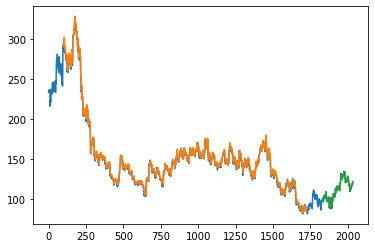

In [39]:
look_back = 100
train_num_pyredict_plot = np.empty_like(data_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(data_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(data_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(data_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

# Future Probabilities

In [40]:
x_inum_pyut=test_data[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()

In [41]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

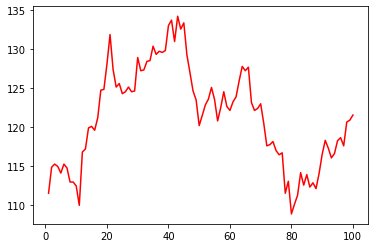

In [44]:
plt.plot(day_new, scaler.inverse_transform(data_close[1935 : ]),color='Red')

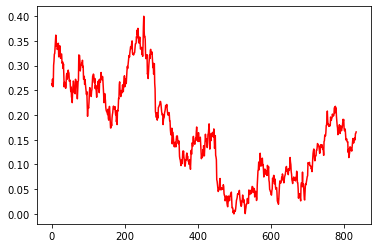

In [45]:
data_merge = data_close.tolist()
plt.plot((data_merge[1200 : ]),color='Red')